In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os

base_dir = '/content/drive/MyDrive/Capstone/valid_dataset/train'

t_aVwD3gjMdI = os.path.join(base_dir, "aVwD3gjMdI")
t_RtMW1nxua4 = os.path.join(base_dir, "RtMW1nxua4")
t_sTZJ3yL7so = os.path.join(base_dir, "sTZJ3yL7so")

print('total training aVwD3gjMdI images:', len(os.listdir(t_aVwD3gjMdI)))
print('total training RtMW1nxua4 images:', len(os.listdir(t_RtMW1nxua4)))
print('total training sTZJ3yL7so images:', len(os.listdir(t_sTZJ3yL7so)))

f_aVwD3gjMdI = os.listdir(t_aVwD3gjMdI)
print(f_aVwD3gjMdI[:10])

f_RtMW1nxua4 = os.listdir(t_RtMW1nxua4)
print(f_RtMW1nxua4[:10])

f_sTZJ3yL7so = os.listdir(t_sTZJ3yL7so)
print(f_sTZJ3yL7so[:10])



total training aVwD3gjMdI images: 1040
total training RtMW1nxua4 images: 1280
total training sTZJ3yL7so images: 1000
['Fanta (84).png', 'Fanta (473).png', 'Fanta (946).png', 'Fanta (785).png', 'Fanta (485).png', 'Fanta (544).png', 'Fanta (731).png', 'Fanta (790).png', 'Fanta (152).png', 'Fanta (956).png']
['bear_brand (271).png', 'bear_brand (778).png', 'bear_brand (1134).png', 'bear_brand (816).png', 'bear_brand (807).png', 'bear_brand (863).png', 'bear_brand (1034).png', 'bear_brand (267).png', 'bear_brand (1313).png', 'bear_brand (165).png']
['Buavita_apel (465).png', 'Buavita_apel (111).png', 'Buavita_apel (483).png', 'Buavita_apel (245).png', 'Buavita_apel (67).png', 'Buavita_apel (874).png', 'Buavita_apel (514).png', 'Buavita_apel (763).png', 'Buavita_apel (174).png', 'Buavita_apel (490).png']


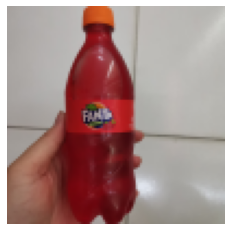

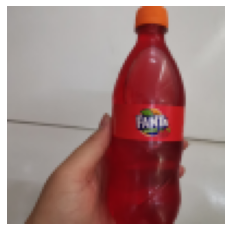

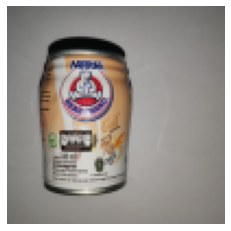

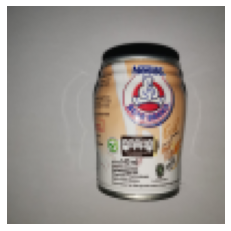

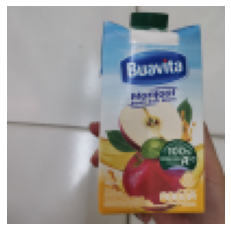

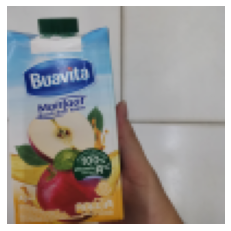

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_aVwD3gjMdI = [os.path.join(t_aVwD3gjMdI, fname) 
                for fname in f_aVwD3gjMdI[pic_index-2:pic_index]]
next_RtMW1nxua4 = [os.path.join(t_RtMW1nxua4, fname) 
                for fname in f_RtMW1nxua4[pic_index-2:pic_index]]
next_sTZJ3yL7so = [os.path.join(t_sTZJ3yL7so, fname) 
                for fname in f_sTZJ3yL7so[pic_index-2:pic_index]]

for i, img_path in enumerate(next_aVwD3gjMdI+next_RtMW1nxua4+next_sTZJ3yL7so):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [ ]:

# Adam Optimizer and Cross Entropy Loss
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Capstone/valid_dataset/train"
training_datagen = ImageDataGenerator(
      rescale = 1./100,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Capstone/valid_dataset/test"
validation_datagen = ImageDataGenerator(rescale = 1./100)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=20
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=20
)

Found 3320 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
# Use TensorBoard
callbacks = TensorBoard(log_dir='./Graph')

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=5, steps_per_epoch=166, validation_data = validation_generator, verbose = 1, validation_steps=30, callbacks=[callbacks])

Epoch 1/5
166/166 [==============================] - 20s 102ms/step - loss: 0.2341 - accuracy: 0.8919 - val_loss: 8.5857e-04 - val_accuracy: 1.0000
Epoch 2/5
166/166 [==============================] - 17s 103ms/step - loss: 0.0224 - accuracy: 0.9928 - val_loss: 1.7673e-05 - val_accuracy: 1.0000
Epoch 3/5
166/166 [==============================] - 17s 101ms/step - loss: 0.0381 - accuracy: 0.9907 - val_loss: 4.9118e-05 - val_accuracy: 1.0000
Epoch 4/5
166/166 [==============================] - 17s 100ms/step - loss: 0.2536 - accuracy: 0.9446 - val_loss: 3.4199e-06 - val_accuracy: 1.0000
Epoch 5/5
166/166 [==============================] - 17s 101ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


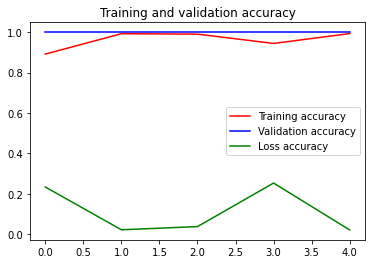

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'g', label='Loss accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
#save model
model.save('/content/drive/MyDrive/Capstone/valid_dataset/model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone/valid_dataset/model/assets


In [ ]:
#save model h5
model.save('/content/drive/MyDrive/Capstone/valid_dataset/model.h5')

In [ ]:
#load model
mymodel=tf.keras.models.load_model('/content/drive/MyDrive/Capstone/valid_dataset/model')

In [ ]:
#Convert to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(mymodel)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open('/content/drive/MyDrive/Capstone/valid_dataset/converted_model.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp8f8aiz2b/assets


INFO:tensorflow:Assets written to: /tmp/tmp8f8aiz2b/assets


5247400

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  class_list = os.listdir(base_dir)
  print(classes)

  for j in range(45):
    if classes[0][j]==1.:
      print("ini kelas ",class_list[j-1])
      break
print()

Saving buavita.jpg to buavita (3).jpg
[[0. 1. 0.]]
ini kelas  RtMW1nxua4

